In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn import svm
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pickle

In [3]:
y_test = pd.read_csv('y_test.csv')
file = open("Selection Methods","rb")
sel_methods = np.load(file)

In [4]:
def support_vec(method, args, _cv, is_sample):
    sample_string = ''
    if (is_sample):
        sample_string = '_sample'
    y_train = pd.read_csv('y_train'+ sample_string + '.csv')    
    method_string = method
    if (method == ''):
        method_string = "no feature selection"
    print('\n\nRunning cross fold validation for SVM with',method_string)
    x_train = pd.read_csv('x_train' + method + sample_string + '.csv').values
    x_test = pd.read_csv('x_test' + method + '.csv').values
    pipe = Pipeline([('clf', svm.SVR())])
    svm_grid = GridSearchCV(pipe, args, cv = _cv, verbose = 1, scoring = 'r2', n_jobs=6)
    svm_grid.fit(x_train, y_train.values.ravel())
    print('\nBest score for SVM with',method_string,":",svm_grid.best_score_)
    best_args = svm_grid.best_estimator_.get_params()
    print('\nBest score for SVM with',method_string,':')
    for arg in best_args:
        print(arg,":",best_args[arg])
    y_test_predict = svm_grid.predict(x_test)
    mse = mean_squared_error(y_test,y_test_predict)
    mae = mean_absolute_error(y_test,y_test_predict)
    r2 = r2_score(y_test,y_test_predict)
    print('\nPrediction scores for SVM using',method_string,':')
    print('Mean Squared error:',mse)
    print('Mean Absolute error:',mae)
    print('R^2:',r2)
    return best_args, svm_grid.best_score_,mse,mae,r2

In [5]:
def support_vec_save_model(method, args, _cv, is_sample):
    sample_string = ''
    if (is_sample):
        sample_string = '_sample'
    y_train = pd.read_csv('y_train'+ sample_string + '.csv')    
    method_string = method
    if (method == ''):
        method_string = "no feature selection"
    x_train = pd.read_csv('x_train' + method + sample_string + '.csv').values
    x_test = pd.read_csv('x_test' + method + '.csv').values
    pipe = Pipeline([('clf', svm.SVR())])
    svm_grid = GridSearchCV(pipe, args, cv = _cv, verbose = 1, scoring = 'r2', n_jobs=6)
    svm_grid.fit(x_train, y_train.values.ravel())
    best_args = svm_grid.best_estimator_.get_params()
    for arg in best_args:
        print(arg,":",best_args[arg])
    y_test_predict = svm_grid.predict(x_test)
    mse = mean_squared_error(y_test,y_test_predict)
    mae = mean_absolute_error(y_test,y_test_predict)
    r2 = r2_score(y_test,y_test_predict)
    with open('Models/svm'+method,'wb') as file:
        pickle.dump(svm_grid.best_estimator_,file)
    return best_args, svm_grid.best_score_,mse,mae,r2

<h3>F-Regression feature selected dataset<h3>

In [9]:
# exploratory hyperparameters set

In [10]:
args = {'clf__C':(0.01,0.5,1,1.5,2,2.5,3,4,5,6,7,8,9,10),
           'clf__degree':(1,2,3,4,5),
           'clf__gamma':('auto',0.01,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1),
           'clf__kernel':('linear','poly','rbf','sigmoid')}

In [11]:
is_sample = True
num_folds = 5
support_vec(sel_methods[0], args, num_folds, is_sample)



Running cross fold validation for SVM with _f_regression
Fitting 5 folds for each of 3360 candidates, totalling 16800 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   20.5s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  3.5min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  6.1min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:  9.7min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed: 14.0min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed: 19.0min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed: 24.7min
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed: 31.4min
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed: 38.7min
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed: 46.7min
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed: 55.8min
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed: 66.1min
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed: 77.6min
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed: 89.3mi


Best score for SVM with _f_regression : 0.7465188614504423

Best score for SVM with _f_regression :
memory : None
steps : [('clf', SVR(C=10, degree=1, gamma=0.3))]
verbose : False
clf : SVR(C=10, degree=1, gamma=0.3)
clf__C : 10
clf__cache_size : 200
clf__coef0 : 0.0
clf__degree : 1
clf__epsilon : 0.1
clf__gamma : 0.3
clf__kernel : rbf
clf__max_iter : -1
clf__shrinking : True
clf__tol : 0.001
clf__verbose : False

Prediction scores for SVM using _f_regression :
Mean Squared error: 4.997956016935091
Mean Absolute error: 1.3366867110288125
R^2: 0.7435925926135536


({'memory': None,
  'steps': [('clf', SVR(C=10, degree=1, gamma=0.3))],
  'verbose': False,
  'clf': SVR(C=10, degree=1, gamma=0.3),
  'clf__C': 10,
  'clf__cache_size': 200,
  'clf__coef0': 0.0,
  'clf__degree': 1,
  'clf__epsilon': 0.1,
  'clf__gamma': 0.3,
  'clf__kernel': 'rbf',
  'clf__max_iter': -1,
  'clf__shrinking': True,
  'clf__tol': 0.001,
  'clf__verbose': False},
 0.7465188614504423,
 4.997956016935091,
 1.3366867110288125,
 0.7435925926135536)

In [22]:
# Optimal c determined as 10 (the final parameter of the range supplied)
# Further parameters of c require exploration to ensure optimal c
#Remaining hyperparameters set to optimal for quicker results

In [23]:
args = {'clf__C':(10,20,30,40,50,60,70,80,90,100),
           'clf__degree':([1]),
           'clf__gamma':([0.3]),
           'clf__kernel':(['rbf'])}

In [24]:
is_sample = True
num_folds = 5
support_vec(sel_methods[0], args, num_folds, is_sample)



Running cross fold validation for SVM with _f_regression
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   22.7s
[Parallel(n_jobs=6)]: Done  50 out of  50 | elapsed:   29.0s finished



Best score for SVM with _f_regression : 0.746527900097748

Best score for SVM with _f_regression :
memory : None
steps : [('clf', SVR(C=20, degree=1, gamma=0.3))]
verbose : False
clf : SVR(C=20, degree=1, gamma=0.3)
clf__C : 20
clf__cache_size : 200
clf__coef0 : 0.0
clf__degree : 1
clf__epsilon : 0.1
clf__gamma : 0.3
clf__kernel : rbf
clf__max_iter : -1
clf__shrinking : True
clf__tol : 0.001
clf__verbose : False

Prediction scores for SVM using _f_regression :
Mean Squared error: 5.001849246603076
Mean Absolute error: 1.337356609309337
R^2: 0.7433928603785869


({'memory': None,
  'steps': [('clf', SVR(C=20, degree=1, gamma=0.3))],
  'verbose': False,
  'clf': SVR(C=20, degree=1, gamma=0.3),
  'clf__C': 20,
  'clf__cache_size': 200,
  'clf__coef0': 0.0,
  'clf__degree': 1,
  'clf__epsilon': 0.1,
  'clf__gamma': 0.3,
  'clf__kernel': 'rbf',
  'clf__max_iter': -1,
  'clf__shrinking': True,
  'clf__tol': 0.001,
  'clf__verbose': False},
 0.746527900097748,
 5.001849246603076,
 1.337356609309337,
 0.7433928603785869)

In [25]:
# Best c found to be 20.  It stands to reason the best c will be between 11 and 29 with all
# hyperparameters attempted again.  New c range defined in previous args and cross validation ran again

In [26]:
is_sample = True
num_folds = 5
args = {'clf__C':(11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29),
           'clf__degree':(1,2,3,4,5),
           'clf__gamma':('auto',0.01,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1),
           'clf__kernel':('linear','poly','rbf','sigmoid')}

In [27]:
support_vec(sel_methods[0], args, num_folds, is_sample)



Running cross fold validation for SVM with _f_regression
Fitting 5 folds for each of 4560 candidates, totalling 22800 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   18.1s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  3.4min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  6.1min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:  9.6min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed: 13.9min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed: 19.0min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed: 24.8min
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed: 31.5min
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed: 38.9min
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed: 47.1min
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed: 56.0min
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed: 65.9min
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed: 76.4min
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed: 87.9mi


Best score for SVM with _f_regression : 0.7469172548014833

Best score for SVM with _f_regression :
memory : None
steps : [('clf', SVR(C=24, degree=1, gamma=0.2))]
verbose : False
clf : SVR(C=24, degree=1, gamma=0.2)
clf__C : 24
clf__cache_size : 200
clf__coef0 : 0.0
clf__degree : 1
clf__epsilon : 0.1
clf__gamma : 0.2
clf__kernel : rbf
clf__max_iter : -1
clf__shrinking : True
clf__tol : 0.001
clf__verbose : False

Prediction scores for SVM using _f_regression :
Mean Squared error: 5.000350182963164
Mean Absolute error: 1.3375286598503773
R^2: 0.7434697660216367


({'memory': None,
  'steps': [('clf', SVR(C=24, degree=1, gamma=0.2))],
  'verbose': False,
  'clf': SVR(C=24, degree=1, gamma=0.2),
  'clf__C': 24,
  'clf__cache_size': 200,
  'clf__coef0': 0.0,
  'clf__degree': 1,
  'clf__epsilon': 0.1,
  'clf__gamma': 0.2,
  'clf__kernel': 'rbf',
  'clf__max_iter': -1,
  'clf__shrinking': True,
  'clf__tol': 0.001,
  'clf__verbose': False},
 0.7469172548014833,
 5.000350182963164,
 1.3375286598503773,
 0.7434697660216367)

In [28]:
# Fine tuned arguments used to determine final hyperparameters, full training dataset used and cv = 10
# degree set to 1 and kernel rbf as these perfomed best in all SVM sample testing
# gamma range explored to another decimal place, minor c variance in case gamma changes it
is_sample = False
num_folds = 10
args = {'clf__C':(22,23,24,25,26),
           'clf__degree':([1]),
           'clf__gamma':('auto',0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25),
           'clf__kernel':(['rbf'])}

In [29]:
f_reg_best_args, f_reg_train_score, f_reg_mse, f_reg_mae, f_reg_r2 = support_vec(sel_methods[0], args, num_folds, is_sample)



Running cross fold validation for SVM with _f_regression
Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  9.6min
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed: 43.6min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed: 99.5min
[Parallel(n_jobs=6)]: Done 600 out of 600 | elapsed: 136.2min finished



Best score for SVM with _f_regression : 0.7374096951243551

Best score for SVM with _f_regression :
memory : None
steps : [('clf', SVR(C=26, degree=1, gamma=0.15))]
verbose : False
clf : SVR(C=26, degree=1, gamma=0.15)
clf__C : 26
clf__cache_size : 200
clf__coef0 : 0.0
clf__degree : 1
clf__epsilon : 0.1
clf__gamma : 0.15
clf__kernel : rbf
clf__max_iter : -1
clf__shrinking : True
clf__tol : 0.001
clf__verbose : False

Prediction scores for SVM using _f_regression :
Mean Squared error: 4.981780364733107
Mean Absolute error: 1.3335570026079564
R^2: 0.7444224432624673


In [38]:
# Lowest gamma and highest c selected, further tuning of both
is_sample = False
num_folds = 10
args = {'clf__C':(24,25,26,27,28,29,30),
           'clf__degree':([1]),
           'clf__gamma':('auto',0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25),
           'clf__kernel':(['rbf'])}

In [39]:
f_reg_best_args, f_reg_train_score, f_reg_mse, f_reg_mae, f_reg_r2 = support_vec(sel_methods[0], args, num_folds, is_sample)



Running cross fold validation for SVM with _f_regression
Fitting 10 folds for each of 126 candidates, totalling 1260 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 10.0min
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed: 45.5min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed: 106.2min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed: 190.3min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed: 308.0min
[Parallel(n_jobs=6)]: Done 1260 out of 1260 | elapsed: 313.2min finished



Best score for SVM with _f_regression : 0.7374184226253806

Best score for SVM with _f_regression :
memory : None
steps : [('clf', SVR(C=29, degree=1, gamma=0.15))]
verbose : False
clf : SVR(C=29, degree=1, gamma=0.15)
clf__C : 29
clf__cache_size : 200
clf__coef0 : 0.0
clf__degree : 1
clf__epsilon : 0.1
clf__gamma : 0.15
clf__kernel : rbf
clf__max_iter : -1
clf__shrinking : True
clf__tol : 0.001
clf__verbose : False

Prediction scores for SVM using _f_regression :
Mean Squared error: 4.982240358282327
Mean Absolute error: 1.3335595889963732
R^2: 0.7443988444646847


In [98]:
# save model
is_sample = False
num_folds = 10
args = {'clf__C':([29]),
           'clf__degree':([1]),
           'clf__gamma':([0.15]),
           'clf__kernel':(['rbf'])}
f_reg_best_args, f_reg_train_score, f_reg_mse, f_reg_mae, f_reg_r2 = support_vec_save_model(
    sel_methods[0], args, num_folds, is_sample)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:  2.5min remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:  2.5min finished


memory : None
steps : [('clf', SVR(C=29, degree=1, gamma=0.15))]
verbose : False
clf : SVR(C=29, degree=1, gamma=0.15)
clf__C : 29
clf__cache_size : 200
clf__coef0 : 0.0
clf__degree : 1
clf__epsilon : 0.1
clf__gamma : 0.15
clf__kernel : rbf
clf__max_iter : -1
clf__shrinking : True
clf__tol : 0.001
clf__verbose : False


<h3>Chi-Squared feature selected dataset<h3>

In [12]:
is_sample = True
num_folds = 5
args = {'clf__C':(11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29),
           'clf__degree':(1,2,3,4,5),
           'clf__gamma':('auto',0.01,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1),
           'clf__kernel':('linear','poly','rbf','sigmoid')}

In [13]:
support_vec(sel_methods[1], args, num_folds, is_sample)



Running cross fold validation for SVM with _chi2
Fitting 5 folds for each of 4560 candidates, totalling 22800 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   21.5s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  4.2min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  7.3min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed: 11.6min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed: 16.9min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed: 22.9min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed: 29.6min
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed: 37.3min
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed: 45.8min
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed: 55.6min
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed: 66.1min
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed: 77.4min
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed: 89.4min
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed: 102.5m


Best score for SVM with _chi2 : 0.73684493877563

Best score for SVM with _chi2 :
memory : None
steps : [('clf', SVR(C=16, degree=1, gamma=0.3))]
verbose : False
clf : SVR(C=16, degree=1, gamma=0.3)
clf__C : 16
clf__cache_size : 200
clf__coef0 : 0.0
clf__degree : 1
clf__epsilon : 0.1
clf__gamma : 0.3
clf__kernel : rbf
clf__max_iter : -1
clf__shrinking : True
clf__tol : 0.001
clf__verbose : False

Prediction scores for SVM using _chi2 :
Mean Squared error: 5.329514995094013
Mean Absolute error: 1.3735301409165281
R^2: 0.7265828034722794


({'memory': None,
  'steps': [('clf', SVR(C=16, degree=1, gamma=0.3))],
  'verbose': False,
  'clf': SVR(C=16, degree=1, gamma=0.3),
  'clf__C': 16,
  'clf__cache_size': 200,
  'clf__coef0': 0.0,
  'clf__degree': 1,
  'clf__epsilon': 0.1,
  'clf__gamma': 0.3,
  'clf__kernel': 'rbf',
  'clf__max_iter': -1,
  'clf__shrinking': True,
  'clf__tol': 0.001,
  'clf__verbose': False},
 0.73684493877563,
 5.329514995094013,
 1.3735301409165281,
 0.7265828034722794)

In [30]:
# Fine tuned arguments used to determine final hyperparameters, full training dataset used and cv = 10
# degree set to 1 and kernel rbf as these perfomed best in all SVM sample testing
# gamma range explored to another decimal place, minor c variance in case gamma changes it
is_sample = False
num_folds = 10
args = {'clf__C':(14,15,16,17,18),
           'clf__degree':([1]),
           'clf__gamma':(0.25,0.26,0.27,0.28,0.29,0.3,0.31,0.32,0.33,0.34,0.35),
           'clf__kernel':(['rbf'])}

In [31]:
chi2_best_args, chi2_train_score, chi2_mse, chi2_mae, chi2_r2 = support_vec(sel_methods[1], args, num_folds, is_sample)



Running cross fold validation for SVM with _chi2
Fitting 10 folds for each of 55 candidates, totalling 550 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 12.3min
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed: 54.7min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed: 127.3min
[Parallel(n_jobs=6)]: Done 550 out of 550 | elapsed: 156.8min finished



Best score for SVM with _chi2 : 0.7244781432990505

Best score for SVM with _chi2 :
memory : None
steps : [('clf', SVR(C=17, degree=1, gamma=0.25))]
verbose : False
clf : SVR(C=17, degree=1, gamma=0.25)
clf__C : 17
clf__cache_size : 200
clf__coef0 : 0.0
clf__degree : 1
clf__epsilon : 0.1
clf__gamma : 0.25
clf__kernel : rbf
clf__max_iter : -1
clf__shrinking : True
clf__tol : 0.001
clf__verbose : False

Prediction scores for SVM using _chi2 :
Mean Squared error: 5.292926597023438
Mean Absolute error: 1.3669777593653234
R^2: 0.728459878071958


In [40]:
# Lowest gamma selected, further tuning of gamma
is_sample = False
num_folds = 10
args = {'clf__C':(14,15,16,17,18,19),
           'clf__degree':([1]),
           'clf__gamma':(0.21,0.22,0.23,0.24,0.25,0.26,0.27,),
           'clf__kernel':(['rbf'])}

In [41]:
chi2_best_args, chi2_train_score, chi2_mse, chi2_mae, chi2_r2 = support_vec(sel_methods[1], args, num_folds, is_sample)



Running cross fold validation for SVM with _chi2
Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 12.1min
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed: 54.8min
[Parallel(n_jobs=6)]: Done 420 out of 420 | elapsed: 119.1min finished



Best score for SVM with _chi2 : 0.7245127244346607

Best score for SVM with _chi2 :
memory : None
steps : [('clf', SVR(C=19, degree=1, gamma=0.22))]
verbose : False
clf : SVR(C=19, degree=1, gamma=0.22)
clf__C : 19
clf__cache_size : 200
clf__coef0 : 0.0
clf__degree : 1
clf__epsilon : 0.1
clf__gamma : 0.22
clf__kernel : rbf
clf__max_iter : -1
clf__shrinking : True
clf__tol : 0.001
clf__verbose : False

Prediction scores for SVM using _chi2 :
Mean Squared error: 5.295705300723949
Mean Absolute error: 1.3671123247497843
R^2: 0.7283173237538869


In [99]:
# save model
is_sample = False
num_folds = 10
args = {'clf__C':([19]),
           'clf__degree':([1]),
           'clf__gamma':([0.22]),
           'clf__kernel':(['rbf'])}
chi2_best_args, chi2_train_score, chi2_mse, chi2_mae, chi2_r2 = support_vec_save_model(
    sel_methods[1], args, num_folds, is_sample)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:  2.8min remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:  2.8min finished


memory : None
steps : [('clf', SVR(C=19, degree=1, gamma=0.22))]
verbose : False
clf : SVR(C=19, degree=1, gamma=0.22)
clf__C : 19
clf__cache_size : 200
clf__coef0 : 0.0
clf__degree : 1
clf__epsilon : 0.1
clf__gamma : 0.22
clf__kernel : rbf
clf__max_iter : -1
clf__shrinking : True
clf__tol : 0.001
clf__verbose : False


<h3>AdaBoost feature selected dataset<h3>

In [16]:
is_sample = True
num_folds = 5
args = {'clf__C':(11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29),
           'clf__degree':(1,2,3,4,5),
           'clf__gamma':('auto',0.01,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1),
           'clf__kernel':('linear','poly','rbf','sigmoid')}

In [17]:
support_vec(sel_methods[2], args, num_folds, is_sample)



Running cross fold validation for SVM with _adaboost
Fitting 5 folds for each of 4560 candidates, totalling 22800 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   21.6s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  3.7min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  6.8min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed: 10.5min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed: 15.4min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed: 22.0min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed: 29.7min
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed: 38.6min
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed: 47.8min
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed: 57.2min
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed: 66.7min
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed: 77.0min
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed: 88.0min
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed: 99.9mi


Best score for SVM with _adaboost : 0.7469343691503707

Best score for SVM with _adaboost :
memory : None
steps : [('clf', SVR(C=27, degree=1, gamma=0.7))]
verbose : False
clf : SVR(C=27, degree=1, gamma=0.7)
clf__C : 27
clf__cache_size : 200
clf__coef0 : 0.0
clf__degree : 1
clf__epsilon : 0.1
clf__gamma : 0.7
clf__kernel : rbf
clf__max_iter : -1
clf__shrinking : True
clf__tol : 0.001
clf__verbose : False

Prediction scores for SVM using _adaboost :
Mean Squared error: 5.0686631708515435
Mean Absolute error: 1.3440948074772878
R^2: 0.7399651421201998


({'memory': None,
  'steps': [('clf', SVR(C=27, degree=1, gamma=0.7))],
  'verbose': False,
  'clf': SVR(C=27, degree=1, gamma=0.7),
  'clf__C': 27,
  'clf__cache_size': 200,
  'clf__coef0': 0.0,
  'clf__degree': 1,
  'clf__epsilon': 0.1,
  'clf__gamma': 0.7,
  'clf__kernel': 'rbf',
  'clf__max_iter': -1,
  'clf__shrinking': True,
  'clf__tol': 0.001,
  'clf__verbose': False},
 0.7469343691503707,
 5.0686631708515435,
 1.3440948074772878,
 0.7399651421201998)

In [32]:
# Fine tuned arguments used to determine final hyperparameters, full training dataset used and cv = 10
# degree set to 1 and kernel rbf as these perfomed best in all SVM sample testing
# gamma range explored to another decimal place, minor c variance in case gamma changes it
is_sample = False
num_folds = 10
args = {'clf__C':(25,26,27,28,29),
           'clf__degree':([1]),
           'clf__gamma':(0.65,0.66,0.67,0.68,0.69,0.7,0.71,0.72,0.73,0.74,0.75),
           'clf__kernel':(['rbf'])}

In [33]:
ada_best_args, ada_train_score, ada_mse, ada_mae, ada_r2 = support_vec(sel_methods[2], args, num_folds, is_sample)



Running cross fold validation for SVM with _adaboost
Fitting 10 folds for each of 55 candidates, totalling 550 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 10.7min
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed: 48.2min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed: 111.2min
[Parallel(n_jobs=6)]: Done 550 out of 550 | elapsed: 138.5min finished



Best score for SVM with _adaboost : 0.7351183327931379

Best score for SVM with _adaboost :
memory : None
steps : [('clf', SVR(C=25, degree=1, gamma=0.65))]
verbose : False
clf : SVR(C=25, degree=1, gamma=0.65)
clf__C : 25
clf__cache_size : 200
clf__coef0 : 0.0
clf__degree : 1
clf__epsilon : 0.1
clf__gamma : 0.65
clf__kernel : rbf
clf__max_iter : -1
clf__shrinking : True
clf__tol : 0.001
clf__verbose : False

Prediction scores for SVM using _adaboost :
Mean Squared error: 5.049075945992113
Mean Absolute error: 1.3389508832510622
R^2: 0.7409700148175753


In [43]:
# Training accuracy dropped with little gain on test set
# Lowest gamma range used, lower gamma explored
is_sample = False
num_folds = 10
args = {'clf__C':(22,23,22,25,26,27,28),
           'clf__degree':([1]),
           'clf__gamma':(0.6,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.7),
           'clf__kernel':(['rbf'])}

In [44]:
ada_best_args, ada_train_score, ada_mse, ada_mae, ada_r2 = support_vec(sel_methods[2], args, num_folds, is_sample)



Running cross fold validation for SVM with _adaboost
Fitting 10 folds for each of 77 candidates, totalling 770 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 10.2min
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed: 46.1min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed: 105.6min
[Parallel(n_jobs=6)]: Done 770 out of 770 | elapsed: 185.7min finished



Best score for SVM with _adaboost : 0.7353971456266457

Best score for SVM with _adaboost :
memory : None
steps : [('clf', SVR(C=22, degree=1, gamma=0.6))]
verbose : False
clf : SVR(C=22, degree=1, gamma=0.6)
clf__C : 22
clf__cache_size : 200
clf__coef0 : 0.0
clf__degree : 1
clf__epsilon : 0.1
clf__gamma : 0.6
clf__kernel : rbf
clf__max_iter : -1
clf__shrinking : True
clf__tol : 0.001
clf__verbose : False

Prediction scores for SVM using _adaboost :
Mean Squared error: 5.047232177450469
Mean Absolute error: 1.3386405976658138
R^2: 0.7410646046679026


In [100]:
# save model
is_sample = False
num_folds = 10
args = {'clf__C':([22]),
           'clf__degree':([1]),
           'clf__gamma':([0.6]),
           'clf__kernel':(['rbf'])}
ada_best_args, ada_train_score, ada_mse, ada_mae, ada_r2 = support_vec_save_model(
    sel_methods[2], args, num_folds, is_sample)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:  2.6min remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:  2.6min finished


memory : None
steps : [('clf', SVR(C=22, degree=1, gamma=0.6))]
verbose : False
clf : SVR(C=22, degree=1, gamma=0.6)
clf__C : 22
clf__cache_size : 200
clf__coef0 : 0.0
clf__degree : 1
clf__epsilon : 0.1
clf__gamma : 0.6
clf__kernel : rbf
clf__max_iter : -1
clf__shrinking : True
clf__tol : 0.001
clf__verbose : False


<h3>Equal business and crime feature selected dataset<h3>

In [18]:
is_sample = True
num_folds = 5
args = {'clf__C':(11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29),
           'clf__degree':(1,2,3,4,5),
           'clf__gamma':('auto',0.01,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1),
           'clf__kernel':('linear','poly','rbf','sigmoid')}

In [19]:
support_vec(sel_methods[3], args, num_folds, is_sample)



Running cross fold validation for SVM with _equal_crime_and_business
Fitting 5 folds for each of 4560 candidates, totalling 22800 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   20.8s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  4.0min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  7.1min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed: 11.2min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed: 16.1min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed: 22.0min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed: 28.6min
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed: 36.1min
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed: 44.0min
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed: 52.6min
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed: 62.2min
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed: 72.7min
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed: 83.9min
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed: 96.1mi


Best score for SVM with _equal_crime_and_business : 0.7309807389993858

Best score for SVM with _equal_crime_and_business :
memory : None
steps : [('clf', SVR(C=14, degree=1, gamma=1))]
verbose : False
clf : SVR(C=14, degree=1, gamma=1)
clf__C : 14
clf__cache_size : 200
clf__coef0 : 0.0
clf__degree : 1
clf__epsilon : 0.1
clf__gamma : 1
clf__kernel : rbf
clf__max_iter : -1
clf__shrinking : True
clf__tol : 0.001
clf__verbose : False

Prediction scores for SVM using _equal_crime_and_business :
Mean Squared error: 5.299125781314615
Mean Absolute error: 1.3668889925648309
R^2: 0.7281418447065932


({'memory': None,
  'steps': [('clf', SVR(C=14, degree=1, gamma=1))],
  'verbose': False,
  'clf': SVR(C=14, degree=1, gamma=1),
  'clf__C': 14,
  'clf__cache_size': 200,
  'clf__coef0': 0.0,
  'clf__degree': 1,
  'clf__epsilon': 0.1,
  'clf__gamma': 1,
  'clf__kernel': 'rbf',
  'clf__max_iter': -1,
  'clf__shrinking': True,
  'clf__tol': 0.001,
  'clf__verbose': False},
 0.7309807389993858,
 5.299125781314615,
 1.3668889925648309,
 0.7281418447065932)

In [34]:
# Max gamma selected from range therefore further exploration required
# Gamma range entended, degree and kernel set to 1 and rbf and c narrowed somewhat
is_sample = True
num_folds = 5
args = {'clf__C':(11,12,13,14,15,16,17,18,19,20),
           'clf__degree':([1]),
           'clf__gamma':('auto',1,2,3,4,5,6,7,8,9,10,15,20,25,30),
           'clf__kernel':(['rbf'])}

In [35]:
equal_best_args, equal_train_score, equal_mse, equal_mae, equal_r2 = support_vec(sel_methods[3], args, num_folds, is_sample)



Running cross fold validation for SVM with _equal_crime_and_business
Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   23.9s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  4.6min
[Parallel(n_jobs=6)]: Done 750 out of 750 | elapsed:  8.0min finished



Best score for SVM with _equal_crime_and_business : 0.7309807389993858

Best score for SVM with _equal_crime_and_business :
memory : None
steps : [('clf', SVR(C=14, degree=1, gamma=1))]
verbose : False
clf : SVR(C=14, degree=1, gamma=1)
clf__C : 14
clf__cache_size : 200
clf__coef0 : 0.0
clf__degree : 1
clf__epsilon : 0.1
clf__gamma : 1
clf__kernel : rbf
clf__max_iter : -1
clf__shrinking : True
clf__tol : 0.001
clf__verbose : False

Prediction scores for SVM using _equal_crime_and_business :
Mean Squared error: 5.299125781314615
Mean Absolute error: 1.3668889925648309
R^2: 0.7281418447065932


In [47]:
# Identical c and gamma, 10 fold validation to confirm
is_sample = False
num_folds = 10
args = {'clf__C':(11,12,13,14,15,16,17,18,19,20),
           'clf__degree':([1]),
           'clf__gamma':('auto',1,2,3,4,5,6,7,8,9,10,15,20,25,30),
           'clf__kernel':(['rbf'])}

In [48]:
equal_best_args, equal_train_score, equal_mse, equal_mae, equal_r2 = support_vec(sel_methods[3], args, num_folds, is_sample)



Running cross fold validation for SVM with _equal_crime_and_business
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  9.7min
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed: 45.9min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed: 108.0min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed: 195.6min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed: 311.0min
[Parallel(n_jobs=6)]: Done 1500 out of 1500 | elapsed: 379.9min finished



Best score for SVM with _equal_crime_and_business : 0.7258499383649648

Best score for SVM with _equal_crime_and_business :
memory : None
steps : [('clf', SVR(C=11, degree=1, gamma=1))]
verbose : False
clf : SVR(C=11, degree=1, gamma=1)
clf__C : 11
clf__cache_size : 200
clf__coef0 : 0.0
clf__degree : 1
clf__epsilon : 0.1
clf__gamma : 1
clf__kernel : rbf
clf__max_iter : -1
clf__shrinking : True
clf__tol : 0.001
clf__verbose : False

Prediction scores for SVM using _equal_crime_and_business :
Mean Squared error: 5.238130036713643
Mean Absolute error: 1.3605291511960949
R^2: 0.731271076072725


<h3> Retrain on revised dataset <h3>

In [9]:
def support_vec_revised(method, args, _cv, is_sample):
    sample_string = ''
    if (is_sample):
        sample_string = '_sample'
    y_train = pd.read_csv('y_train'+ sample_string + '_revised.csv')    
    method_string = method
    if (method == ''):
        method_string = "no feature selection"
    print('\n\nRunning cross fold validation for SVM with',method_string)
    x_train = pd.read_csv('x_train' + method + sample_string + '.csv').values
    x_test = pd.read_csv('x_test' + method + '.csv').values
    pipe = Pipeline([('clf', svm.SVR())])
    svm_grid = GridSearchCV(pipe, args, cv = _cv, verbose = 1, scoring = 'r2', n_jobs=6)
    svm_grid.fit(x_train, y_train.values.ravel())
    print('\nBest score for SVM with',method_string,":",svm_grid.best_score_)
    best_args = svm_grid.best_estimator_.get_params()
    print('\nBest score for SVM with',method_string,':')
    for arg in best_args:
        print(arg,":",best_args[arg])
    y_test_predict = svm_grid.predict(x_test)
    mse = mean_squared_error(y_test,y_test_predict)
    mae = mean_absolute_error(y_test,y_test_predict)
    r2 = r2_score(y_test,y_test_predict)
    print('\nPrediction scores for SVM using',method_string,':')
    print('Mean Squared error:',mse)
    print('Mean Absolute error:',mae)
    print('R^2:',r2)
    return best_args, svm_grid.best_score_,mse,mae,r2

In [6]:
is_sample = True
num_folds = 5
args = {'clf__C':(11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29),
           'clf__degree':(1,2,3,4,5),
           'clf__gamma':('auto',0.01,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1),
           'clf__kernel':('linear','poly','rbf','sigmoid')}

In [ ]:
equal_best_args, equal_train_score, equal_mse, equal_mae, equal_r2 = support_vec_revised(sel_methods[3], args, num_folds, is_sample)



Running cross fold validation for SVM with _equal_crime_and_business
Fitting 5 folds for each of 4560 candidates, totalling 22800 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   19.9s


In [101]:
# save model
is_sample = False
num_folds = 10
args = {'clf__C':([11]),
           'clf__degree':([1]),
           'clf__gamma':([1]),
           'clf__kernel':(['rbf'])}
equal_best_args, equal_train_score, equal_mse, equal_mae, equal_r2 = support_vec_save_model(
    sel_methods[3], args, num_folds, is_sample)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:  2.6min remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:  2.6min finished


memory : None
steps : [('clf', SVR(C=11, degree=1, gamma=1))]
verbose : False
clf : SVR(C=11, degree=1, gamma=1)
clf__C : 11
clf__cache_size : 200
clf__coef0 : 0.0
clf__degree : 1
clf__epsilon : 0.1
clf__gamma : 1
clf__kernel : rbf
clf__max_iter : -1
clf__shrinking : True
clf__tol : 0.001
clf__verbose : False


<h3>All business feature selected dataset<h3>

In [20]:
is_sample = True
num_folds = 5
args = {'clf__C':(11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29),
           'clf__degree':(1,2,3,4,5),
           'clf__gamma':('auto',0.01,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1),
           'clf__kernel':('linear','poly','rbf','sigmoid')}

In [21]:
support_vec(sel_methods[4], args, num_folds, is_sample)



Running cross fold validation for SVM with _all_business
Fitting 5 folds for each of 4560 candidates, totalling 22800 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   19.5s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  3.7min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  6.7min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed: 10.6min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed: 15.2min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed: 20.8min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed: 27.2min
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed: 34.5min
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed: 42.7min
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed: 51.8min
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed: 61.8min
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed: 72.7min
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed: 84.4min
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed: 97.0mi


Best score for SVM with _all_business : 0.45714616000241326

Best score for SVM with _all_business :
memory : None
steps : [('clf', SVR(C=29, degree=1, gamma=1))]
verbose : False
clf : SVR(C=29, degree=1, gamma=1)
clf__C : 29
clf__cache_size : 200
clf__coef0 : 0.0
clf__degree : 1
clf__epsilon : 0.1
clf__gamma : 1
clf__kernel : rbf
clf__max_iter : -1
clf__shrinking : True
clf__tol : 0.001
clf__verbose : False

Prediction scores for SVM using _all_business :
Mean Squared error: 10.278743860862496
Mean Absolute error: 1.709541718505771
R^2: 0.47267521850476246


({'memory': None,
  'steps': [('clf', SVR(C=29, degree=1, gamma=1))],
  'verbose': False,
  'clf': SVR(C=29, degree=1, gamma=1),
  'clf__C': 29,
  'clf__cache_size': 200,
  'clf__coef0': 0.0,
  'clf__degree': 1,
  'clf__epsilon': 0.1,
  'clf__gamma': 1,
  'clf__kernel': 'rbf',
  'clf__max_iter': -1,
  'clf__shrinking': True,
  'clf__tol': 0.001,
  'clf__verbose': False},
 0.45714616000241326,
 10.278743860862496,
 1.709541718505771,
 0.47267521850476246)

In [36]:
# Max c and gamma selected from range therefore further exploration required
# Degree and kernel set to 1 and rbf
is_sample = True
num_folds = 5
args = {'clf__C':(29,30,31,32,33,34,35,40,45,50,55,60,65,70),
           'clf__degree':([1]),
           'clf__gamma':('auto',1,2,3,4,5,6,7,8,9,10,15,20,25,30),
           'clf__kernel':(['rbf'])}

In [37]:
bus_best_args, bus_train_score, bus_mse, bus_mae, bus_r2 = support_vec(sel_methods[4], args, num_folds, is_sample)



Running cross fold validation for SVM with _all_business
Fitting 5 folds for each of 210 candidates, totalling 1050 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   26.2s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  4.7min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  8.5min
[Parallel(n_jobs=6)]: Done 1050 out of 1050 | elapsed: 11.6min finished



Best score for SVM with _all_business : 0.5102364355648122

Best score for SVM with _all_business :
memory : None
steps : [('clf', SVR(C=29, degree=1, gamma=30))]
verbose : False
clf : SVR(C=29, degree=1, gamma=30)
clf__C : 29
clf__cache_size : 200
clf__coef0 : 0.0
clf__degree : 1
clf__epsilon : 0.1
clf__gamma : 30
clf__kernel : rbf
clf__max_iter : -1
clf__shrinking : True
clf__tol : 0.001
clf__verbose : False

Prediction scores for SVM using _all_business :
Mean Squared error: 9.147343403932124
Mean Absolute error: 1.6315447221667472
R^2: 0.5307188381153359


In [45]:
# C selections remained same, max gamma chosen again, max gamma range extended further
# Degree and kernel set to 1 and rbf
is_sample = True
num_folds = 5
args = {'clf__C':(27,28,29,30,31),
           'clf__degree':([1]),
           'clf__gamma':('auto',25,30,35,40,45,50,60,70,80,90,100),
           'clf__kernel':(['rbf'])}

In [46]:
bus_best_args, bus_train_score, bus_mse, bus_mae, bus_r2 = support_vec(sel_methods[4], args, num_folds, is_sample)



Running cross fold validation for SVM with _all_business
Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   27.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 300 out of 300 | elapsed:  3.4min finished



Best score for SVM with _all_business : 0.524463120299917

Best score for SVM with _all_business :
memory : None
steps : [('clf', SVR(C=27, degree=1, gamma=100))]
verbose : False
clf : SVR(C=27, degree=1, gamma=100)
clf__C : 27
clf__cache_size : 200
clf__coef0 : 0.0
clf__degree : 1
clf__epsilon : 0.1
clf__gamma : 100
clf__kernel : rbf
clf__max_iter : -1
clf__shrinking : True
clf__tol : 0.001
clf__verbose : False

Prediction scores for SVM using _all_business :
Mean Squared error: 9.272104208042249
Mean Absolute error: 1.6405573645297156
R^2: 0.5243183027330853


In [49]:
# C and gamma continue to vary but accuracy gain is minimal
# 10 fold validation to select most accurate
is_sample = False
num_folds = 10
args = {'clf__C':(26,27,28,29,30,31,32),
           'clf__degree':([1]),
           'clf__gamma':('auto',30,40,50,60,70,80,90,100),
           'clf__kernel':(['rbf'])}

In [50]:
bus_best_args, bus_train_score, bus_mse, bus_mae, bus_r2 = support_vec(sel_methods[4], args, num_folds, is_sample)



Running cross fold validation for SVM with _all_business
Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 11.3min
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed: 54.8min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed: 128.3min
[Parallel(n_jobs=6)]: Done 630 out of 630 | elapsed: 190.0min finished



Best score for SVM with _all_business : 0.5530674369081444

Best score for SVM with _all_business :
memory : None
steps : [('clf', SVR(C=30, degree=1, gamma=100))]
verbose : False
clf : SVR(C=30, degree=1, gamma=100)
clf__C : 30
clf__cache_size : 200
clf__coef0 : 0.0
clf__degree : 1
clf__epsilon : 0.1
clf__gamma : 100
clf__kernel : rbf
clf__max_iter : -1
clf__shrinking : True
clf__tol : 0.001
clf__verbose : False

Prediction scores for SVM using _all_business :
Mean Squared error: 8.711871518311668
Mean Absolute error: 1.6030613847950792
R^2: 0.5530596143853321


In [102]:
# save model
is_sample = False
num_folds = 10
args = {'clf__C':([30]),
           'clf__degree':([1]),
           'clf__gamma':([100]),
           'clf__kernel':(['rbf'])}
bus_best_args, bus_train_score, bus_mse, bus_mae, bus_r2 = support_vec_save_model(
    sel_methods[4], args, num_folds, is_sample)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:  3.4min remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:  3.4min finished


memory : None
steps : [('clf', SVR(C=30, degree=1, gamma=100))]
verbose : False
clf : SVR(C=30, degree=1, gamma=100)
clf__C : 30
clf__cache_size : 200
clf__coef0 : 0.0
clf__degree : 1
clf__epsilon : 0.1
clf__gamma : 100
clf__kernel : rbf
clf__max_iter : -1
clf__shrinking : True
clf__tol : 0.001
clf__verbose : False


<h3>Visualise scores<h3>

In [103]:
training_scores = [f_reg_train_score, chi2_train_score, ada_train_score, equal_train_score, bus_train_score]
mse_scores = [f_reg_mse, chi2_mse, ada_mse, equal_mse, bus_mse]
mae_scores = [f_reg_mae, chi2_mae, ada_mae, equal_mae, bus_mae]
r2_scores = [f_reg_r2, chi2_r2, ada_r2, equal_r2, bus_r2]

In [104]:
datasets = ["F-Regression","Chi-Squared","AdaBoost","Equal Business\nand Crime","All Business"]

In [105]:
y_select = np.arange(len(datasets))

<BarContainer object of 5 artists>

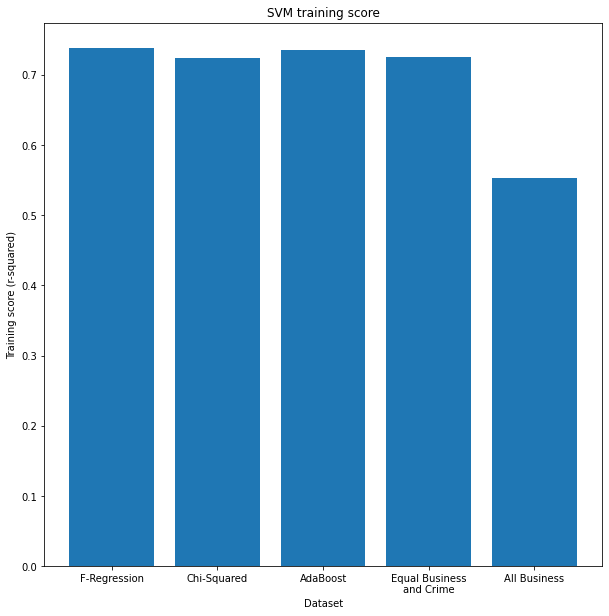

In [106]:
plt.figure(figsize = (10,10))
plt.xticks(y_select,datasets)
plt.title("SVM training score")
plt.xlabel("Dataset")
plt.ylabel("Training score (r-squared)")
plt.bar(y_select, training_scores)

<BarContainer object of 5 artists>

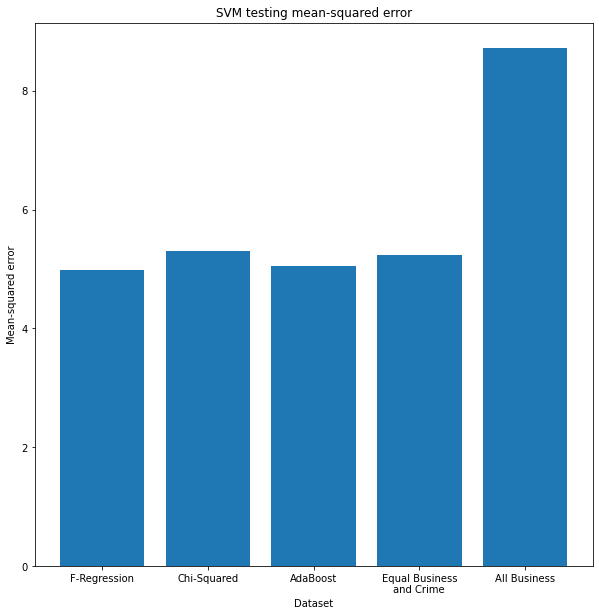

In [107]:
plt.figure(figsize = (10,10))
plt.xticks(y_select,datasets)
plt.xlabel("Dataset")
plt.ylabel("Mean-squared error")
plt.title("SVM testing mean-squared error")
plt.bar(y_select, mse_scores)

<BarContainer object of 5 artists>

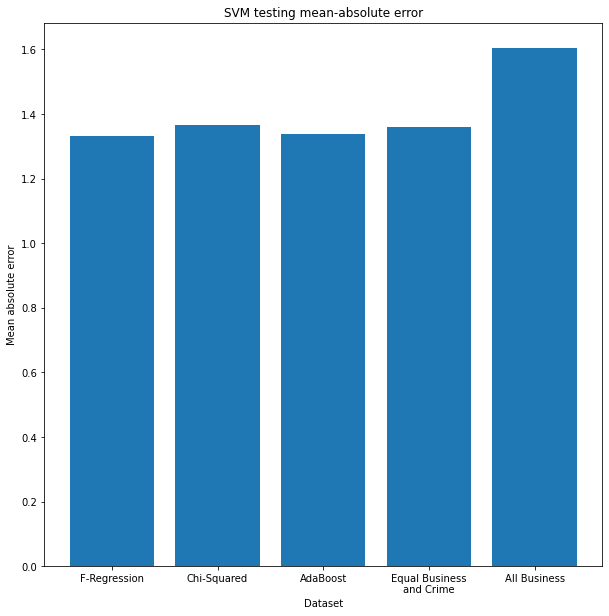

In [108]:
plt.figure(figsize = (10,10))
plt.xticks(y_select,datasets)
plt.xlabel("Dataset")
plt.ylabel("Mean absolute error")
plt.title("SVM testing mean-absolute error")
plt.bar(y_select, mae_scores)

<BarContainer object of 5 artists>

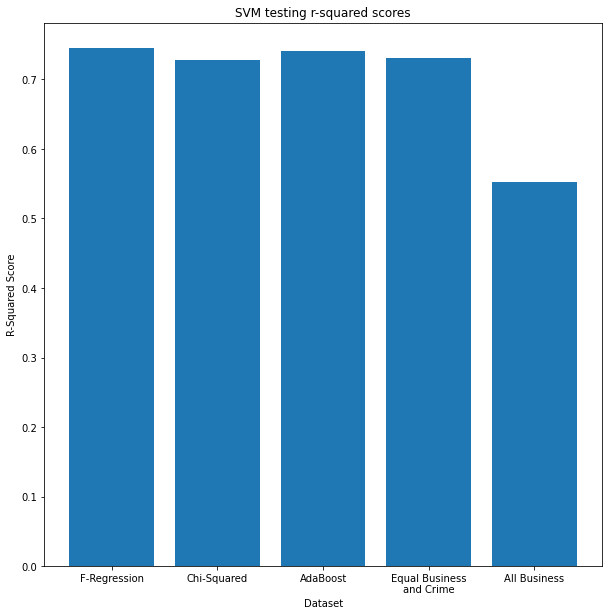

In [109]:
plt.figure(figsize = (10,10))
plt.xticks(y_select,datasets)
plt.xlabel("Dataset")
plt.ylabel("R-Squared Score")
plt.title("SVM testing r-squared scores")
plt.bar(y_select, r2_scores)

In [ ]:
# f-regression dataset appears to perform best with SVM, closeley followed by Adaboost
# All business dataset does not produce accurate results